# Buying at the close of trading and selling it at the next day’s market open 

### Reference: https://www.bloomberg.com/news/articles/2019-07-25/for-monster-gains-with-world-s-largest-etf-trade-it-after-hours

According to Bloomberg,  for SPDR S&P 500 ETF, or SPY, buying at the end of trading hour on one day and selling at the start of trading hour on the next day can provide 670% since 1993. This python will study this strategy in depth. 

First is to import module 
<br> The data source is obtained from Yahoo Finance 

In [1]:
# import modules
import yfinance 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

The study will be carried by using a fund to study the differences in performance of both "Buy-close-sell-open" and "buy and hold" strategies.
<br>One thing that needs to consider is dividend. Since a stock is ex-dividend before the open of ex-dividend date. As a result, an investor will collect the dividend under this strategy. In this study, dividend will be collected into the fund and it can be reinvested right after ex-dividend.


First is to download data for SPY
<br>The study period is from 2010 to 2018

In [2]:
spy = yfinance.Ticker("SPY")
stock_price = spy.history(start="2010-01-04", end="2018-12-31")
stock_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,92.88,93.72,92.17,93.68,118944600,0.0,0
2010-01-05,93.62,93.96,93.28,93.92,111579900,0.0,0
2010-01-06,93.83,94.22,93.76,93.99,116074400,0.0,0
2010-01-07,93.82,94.50,93.55,94.39,131091100,0.0,0
2010-01-08,94.14,94.74,93.95,94.70,126402800,0.0,0


First step is to check if there is stock split for SPY

In [3]:
set(stock_price['Stock Splits'])

{0}

So there is no stock split during the period
<br>Second is to only keep open, close and Dividends from stock_price df 
<br>The df is called performance_bcso (buy close sell open)

In [4]:
performance_bcso = stock_price[['Open','Close','Dividends']]

In [5]:
performance_bcso.loc[:,'Funds']=np.nan
performance_bcso.loc[:,'Num_share']= np.nan
performance_bcso.loc[:,'Remaining']=np.nan
performance_bcso.loc[:,'EOD_Total']=np.nan

C:\Users\Yuasto\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Yuasto\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
performance_bcso['Funds'][0]=10000
performance_bcso['Num_share'][0]= performance_bcso['Funds'][0]//performance_bcso['Close'][0]
performance_bcso['Remaining'][0] = performance_bcso['Funds'][0] - performance_bcso['Num_share'][0]*performance_bcso['Close'][0]
performance_bcso['EOD_Total'][0] = performance_bcso['Num_share'][0]*performance_bcso['Close'][0] + performance_bcso['Remaining'][0]

In [7]:
for i in range(1,performance_bcso.shape[0]):
    performance_bcso['Funds'][i]=performance_bcso['Num_share'][i-1]*(performance_bcso['Open'][i]+performance_bcso['Dividends'][i])+performance_bcso['Remaining'][i-1]
    performance_bcso['Num_share'][i]= performance_bcso['Funds'][i]//performance_bcso['Close'][i]
    performance_bcso['Remaining'][i] = performance_bcso['Funds'][i] - performance_bcso['Num_share'][i]*performance_bcso['Close'][i]
    performance_bcso['EOD_Total'][i] = performance_bcso['Num_share'][i]*performance_bcso['Close'][i] + performance_bcso['Remaining'][i]

In [8]:
performance_bcso.head()

,Open,Close,Dividends,Funds,Num_share,Remaining,EOD_Total
Date,,,,,,,
2010-01-04,92.88,93.68,0.0,10000.00,106.0,69.92,10000.00
2010-01-05,93.62,93.92,0.0,9993.64,106.0,38.12,9993.64
2010-01-06,93.83,93.99,0.0,9984.10,106.0,21.16,9984.10
2010-01-07,93.82,94.39,0.0,9966.08,105.0,55.13,9966.08
2010-01-08,94.14,94.70,0.0,9939.83,104.0,91.03,9939.83


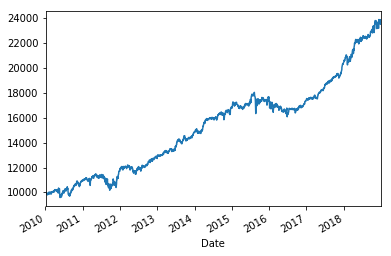

In [9]:
performance_bcso['Funds'].plot()
plt.show()

In [10]:
performance_bcso['EOD_Total'][-1]/performance_bcso['EOD_Total'][0]-1

1.3673641000000027

So from 2010 to 2018, this strategy provides over 136% of return. Seems not bad.
<br>But this should be compared with traditional "buy and hold" strategy in order to know if this is way better 

Here create another df called performance_bah (buy and hold)

In [11]:
performance_bah = stock_price[['Open','Close','Dividends']]
performance_bah.loc[:,'Funds']= np.nan
performance_bah.loc[:,'Num_share']= np.nan
performance_bah.loc[:,'Remaining']=np.nan
performance_bah.loc[:,'EOD_Total']=np.nan

performance_bah['Funds'][0]=10000
performance_bah['Num_share'][0]= performance_bah['Funds'][0]//performance_bah['Close'][0]
performance_bah['Remaining'][0] = performance_bah['Funds'][0] - performance_bah['Num_share'][0]*performance_bah['Close'][0]
performance_bah['EOD_Total'][0] = performance_bah['Num_share'][0]*performance_bah['Close'][0] + performance_bah['Remaining'][0]

for i in range(1,performance_bah.shape[0]):
    performance_bah['Funds'][i]=performance_bah['EOD_Total'][i-1]
    if performance_bah['Dividends'][i]>0:
        total_dividend = performance_bah['Dividends'][i]*performance_bah['Num_share'][i-1]
        performance_bah['Remaining'][i] = performance_bah['Remaining'][i-1] + total_dividend
        performance_bah['Num_share'][i] = performance_bah['Num_share'][i-1]
        
        if performance_bah['Remaining'][i] > performance_bah['Open'][i]:
            num_share_reinvest = performance_bah['Remaining'][i] // performance_bah['Open'][i]
            performance_bah['Num_share'][i] = performance_bah['Num_share'][i-1]+num_share_reinvest
            performance_bah['Remaining'][i] = performance_bah['Remaining'][i] - num_share_reinvest*performance_bah['Open'][i]

    else:
        performance_bah['Num_share'][i] = performance_bah['Num_share'][i-1]
        performance_bah['Remaining'][i] = performance_bah['Remaining'][i-1] 
    
    performance_bah['EOD_Total'][i] = performance_bah['Num_share'][i]*performance_bah['Close'][i] + performance_bah['Remaining'][i]

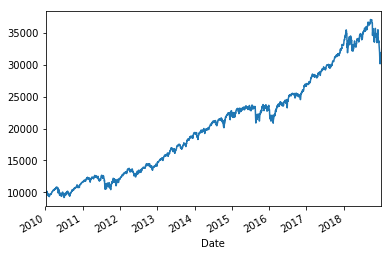

In [12]:
performance_bah['EOD_Total'].plot()
plt.show()

In [13]:
performance_bah['EOD_Total'][-1]/performance_bah['EOD_Total'][0]-1

2.1841562000000003

As a result, buy and hold strategy is better than buy close and sell open strategy.